In [1]:
# Importing the required libraries
import pandas as pd
import yellowbrick

In [2]:
#Step 1:  Load data into a dataframe
addr1 = "StudentsPerformance.csv"
data = pd.read_csv(addr1)

In [3]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (1000, 9)


In [4]:
#Step 3:  Look at the data
print(data.head(5))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  Pass  
0                    none        72.0           72.0           74.0     1  
1               completed        69.0           90.0           88.0     1  
2                    none        90.0           95.0           93.0     1  
3                    none        47.0           57.0           44.0     0  
4                    none         NaN            NaN            NaN     0  


In [5]:
#Step 4:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
       math score  reading score  writing score         Pass
count  994.000000     995.000000     994.000000  1000.000000
mean    66.113682      69.194975      68.096579     0.448000
std     15.173590      14.600521      15.199470     0.497537
min      0.000000      17.000000      10.000000     0.000000
25%     57.000000      59.000000      58.000000     0.000000
50%     66.000000      70.000000      69.000000     0.000000
75%     77.000000      79.000000      79.000000     1.000000
max    100.000000     100.000000     100.000000     1.000000
Summarized Data
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test preparation course  
count                     1000  

In [6]:
# Step 5 - fill in missing values and eliminate features
# fill the missing age data with 0
def fill_na_most(data_reqfeatures, inplace=True):
    return data.fillna(0, inplace=inplace)

fill_na_most(data['math score'])
fill_na_most(data['reading score'])
fill_na_most(data['writing score'])

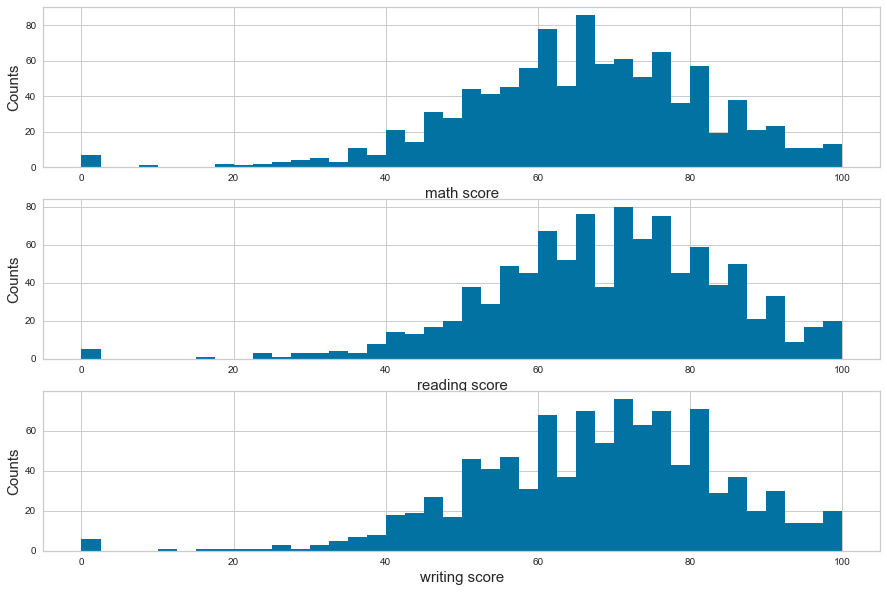

In [7]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (15, 10)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 1)

# Specify the features of interest
#num_features = ['gender', 'race/ethnicity']
num_features = ['math score','reading score','writing score']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=15)
    ax.set_ylabel(yaxes[idx], fontsize=15)
    ax.tick_params(axis='both', labelsize=10)
plt.show()

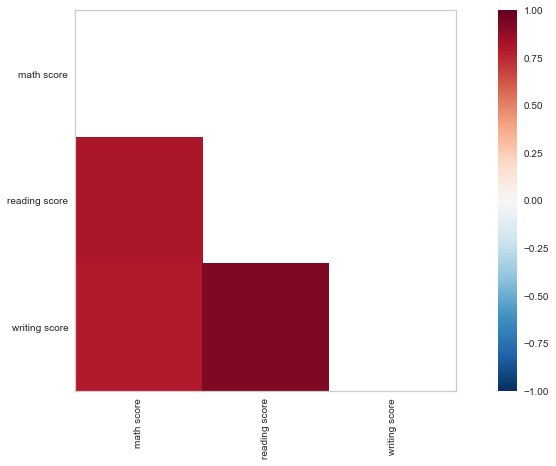

In [8]:
#Step 7: Pearson Ranking
#set up the figure size

plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D
num_features=['math score','reading score','writing score']

# extract the numpy arrays from the data frame
X = data[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.show()

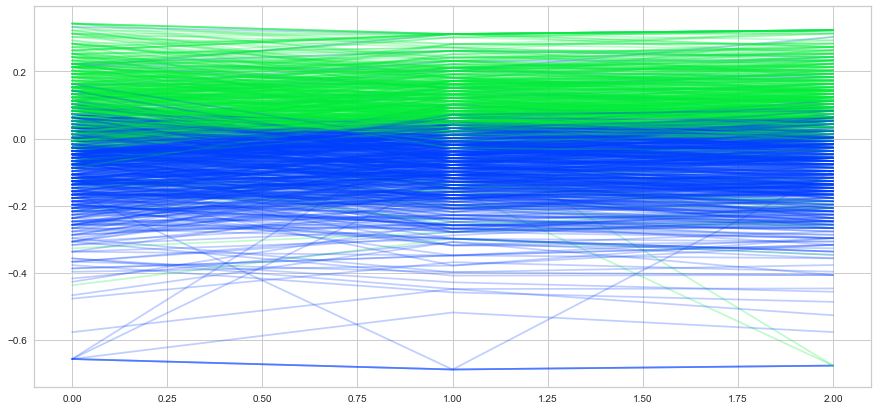

In [9]:
# Step 8:  Compare variables against Course completed ot not
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Fail', 'Pass']
num_features=['math score','reading score','writing score']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data['Pass'].values
#print(X)

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
plt.show();

In [10]:
# Step 9 - create a whole features dataset that can be used for train and validation data splitting
features_model = ['math score','reading score','writing score']
data_model_X = data[features_model]

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data['Pass']  

# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Pass and Fail
print('\n')
print('No. of Pass and Fail in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Pass and Fail in the validation set:')
print(y_val.value_counts())
#print(y_val)

No. of samples in training set:  700
No. of samples in validation set: 300


No. of Pass and Fail in the training set:
0    380
1    320
Name: Pass, dtype: int64


No. of Pass and Fail in the validation set:
0    172
1    128
Name: Pass, dtype: int64


Accuracy: 93.67%


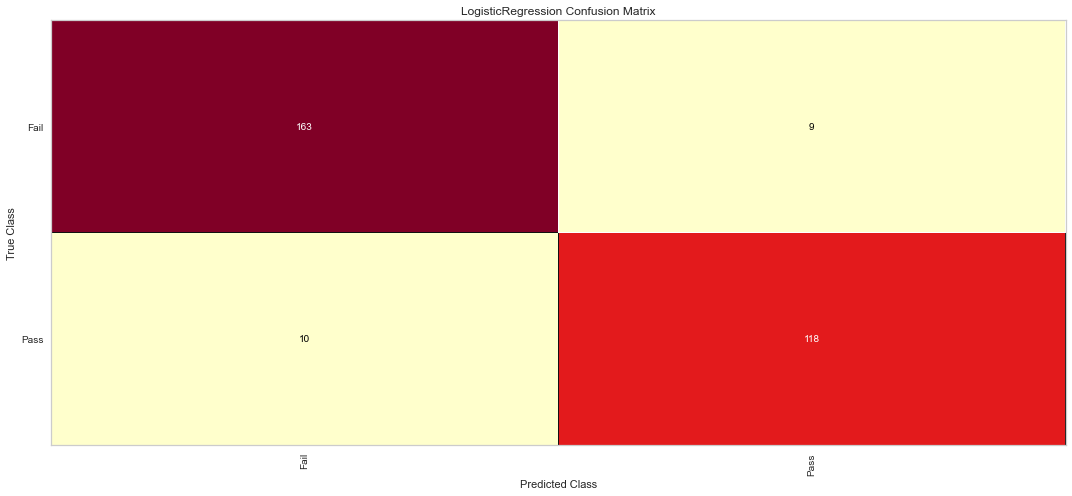

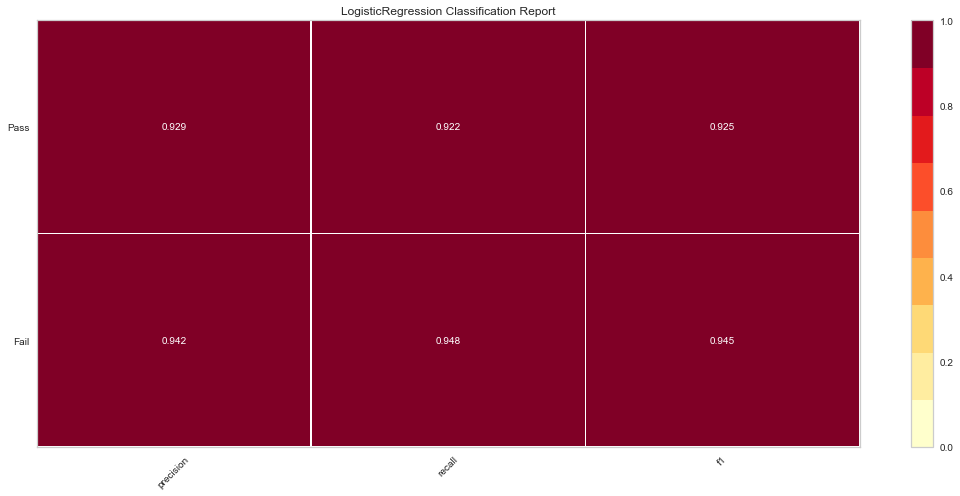

In [12]:
# Step 10 - Eval Metrics
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn import metrics

# Instantiate the classification model 
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_val)

print(f"Accuracy: {metrics.accuracy_score(y_val, y_pred)*100:0.2f}%")

#The ConfusionMatrix visualizer taxes a model
classes = ['Fail','Pass']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(10)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 10

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()